# Main file for the project 
This is a project mainly contain the implementation of 'attention is all you need' paper.

## Importing the modules
The mostly use module in this project is gonna be numpy for sure so make sure you download it properly before following this notebook.

In [1]:
import pandas as pd # For tabular datasets
import numpy as np # mainly use mathematical library
import torch # Deep learning library 


c:\Users\siwar\.conda\envs\tfpt\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Self-attention

Some references

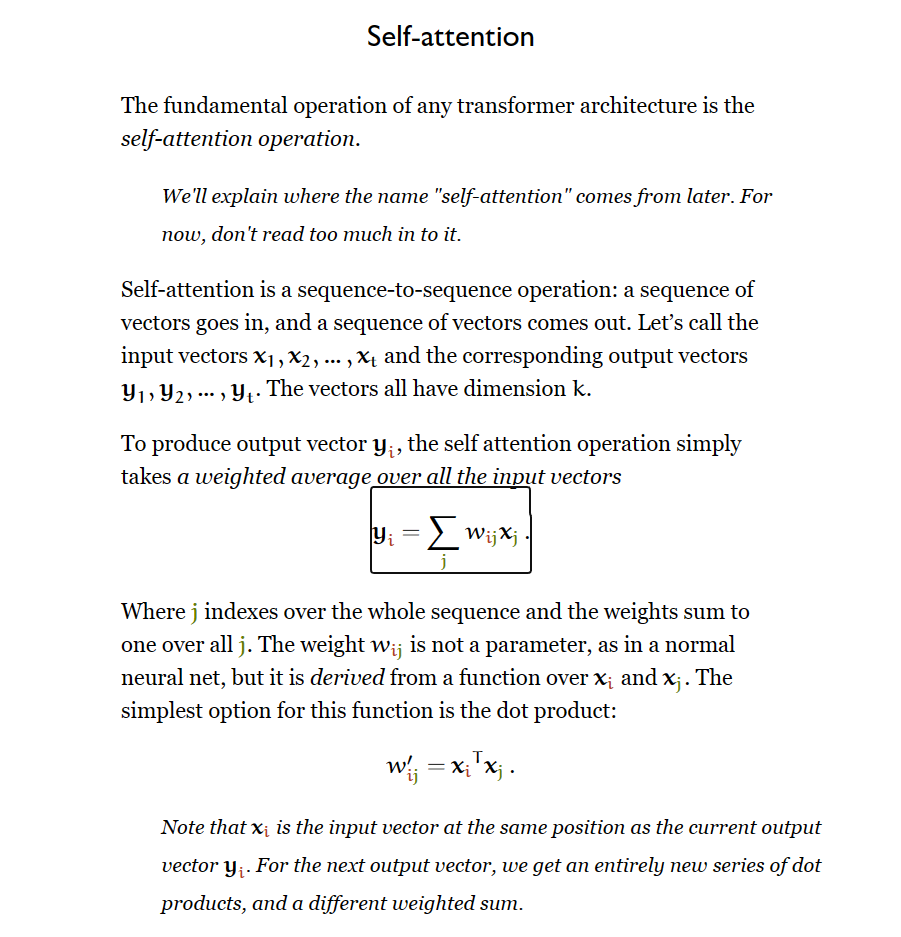
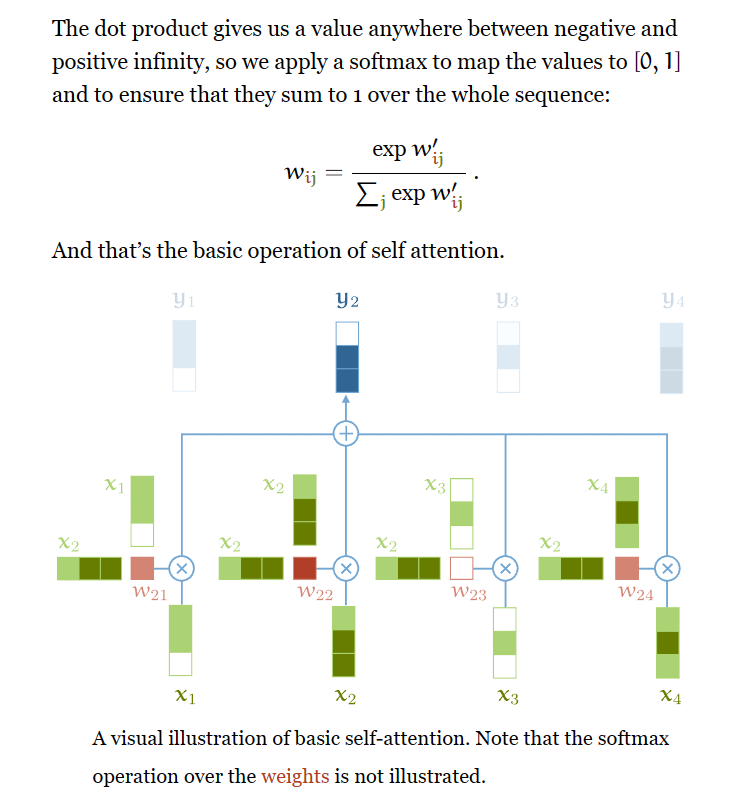

***The interpretation by me ***
First, we take a look at the phase " sequence-to-sequence operation". The sequence-to-sequence operation in this case means that when we enter an input of length n to the operation, we expect to get an output of the same length as the input.
After that, we will consider the main operation.

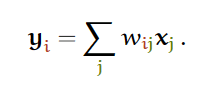


as you can see here, yi is a sum of the weighted average of each Xj over Xi, multiplied by Xj, which means we get the sum of all information from all inputs that are important to Xi.
Then we got introduced the weighted average operation.

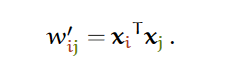

As you can see here, the weighted average operation is in fact just a dot product of transposed Xi multiplied by Xj, which tells us the importance of Xj to Xi.
followed by this operation,

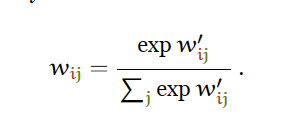

Instead of using the raw weighted average of xi over xj, we have to make it more polished by mapping the weighted average we got with the softmax operation to scale down our value within the range of [0, 1].

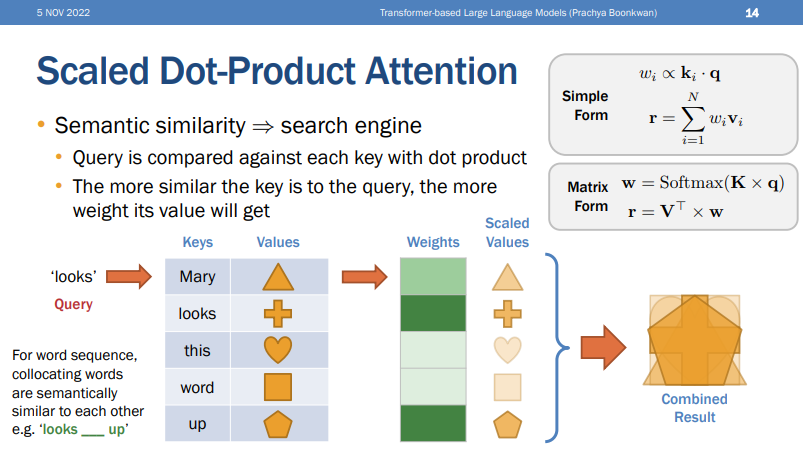

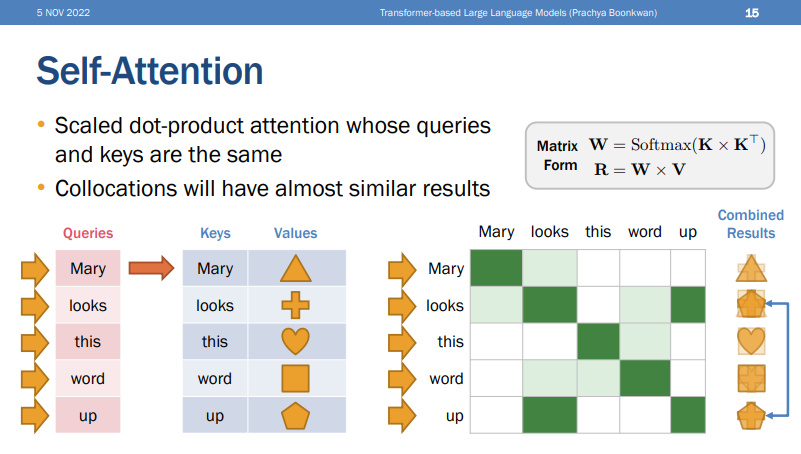

array([1, 2, 3])